In [1]:
# import stuff
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
%matplotlib  widget 

In [2]:
np.random.seed(10)

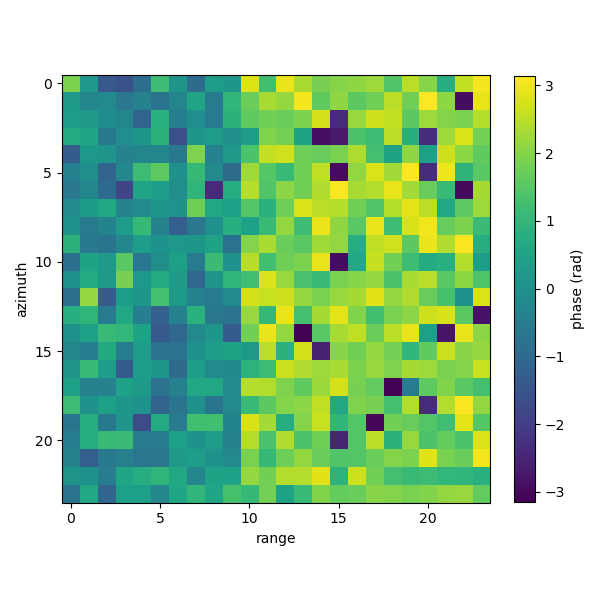

In [3]:
# make nxn synthetic igram 
dx = 24
dy = 24
med = 0.0
std = 0.8

igram_synth = np.random.normal(med,std,(dy,dx))
igram_synth[:,0:int(np.round(dx/2))+2] = igram_synth[:,0:int(np.round(dx/2))+2] + 2.0
igram = np.exp(1j*igram_synth)
igram_phs = np.angle(igram)

plt.figure(figsize=(6,6),tight_layout=True)
plt.imshow(np.fliplr(igram_phs),vmin=-np.pi,vmax=np.pi)
plt.colorbar(label='phase (rad)',fraction=0.045); plt.xlabel('range'); plt.ylabel('azimuth')
plt.show()

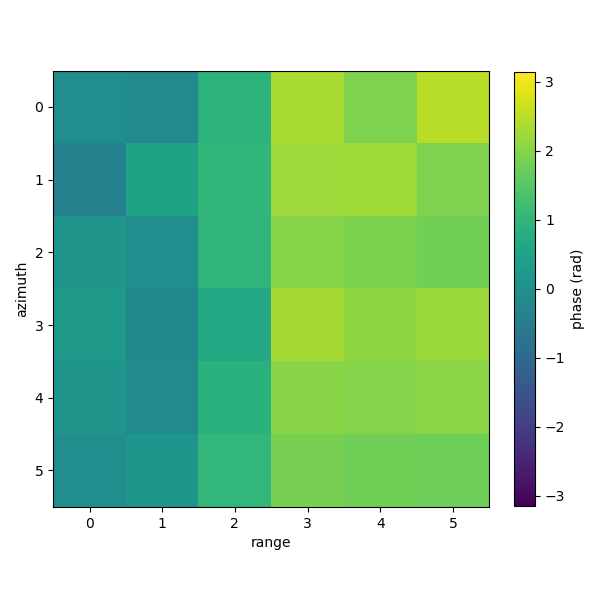

In [4]:
# now downsample it
rlooks = 4   # x-direction
alooks = 4  # y-direction

dy_ds = int(np.round(dy/alooks))
dx_ds = int(np.round(dy/rlooks))
igram_ds = np.ndarray((dy_ds,dx_ds),dtype='complex')

for y in range(dy_ds):
    for x in range(dx_ds):
        # add complex numbers then take the angle 
        igram_ds[y,x] = (np.sum(igram[y*alooks:(y+1)*alooks,x*rlooks:(x+1)*rlooks]))


plt.figure(figsize=(6,6),tight_layout=True)
plt.imshow(np.fliplr(np.angle(igram_ds)),vmin=-np.pi,vmax=np.pi)
plt.colorbar(label='phase (rad)',fraction=0.045); plt.xlabel('range'); plt.ylabel('azimuth')
plt.show()

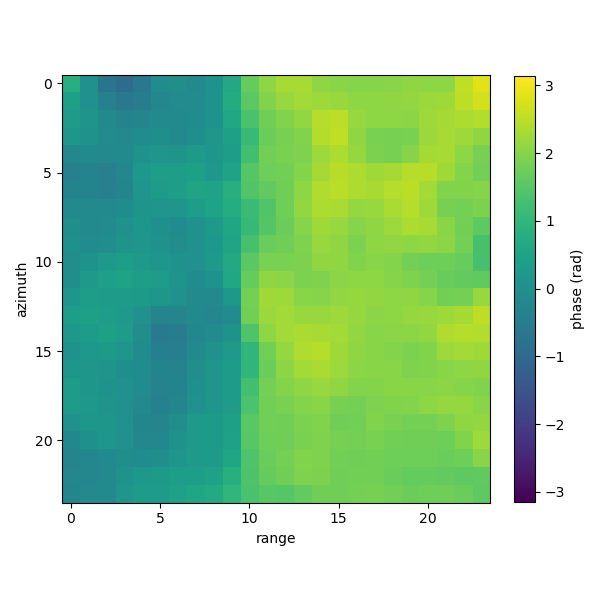

In [5]:
# now spatially filter it 
igram_filt_r = gaussian_filter(np.real(igram), sigma=[alooks/4,rlooks/4])
igram_filt_i = gaussian_filter(np.imag(igram), sigma=[alooks/4,rlooks/4])
igram_filt = igram_filt_r+1j*igram_filt_i

plt.figure(figsize=(6,6),tight_layout=True)
plt.imshow(np.fliplr(np.angle(igram_filt)),vmin=-np.pi,vmax=np.pi)
plt.colorbar(label='phase (rad)',fraction=0.045); plt.xlabel('range'); plt.ylabel('azimuth')
plt.show()

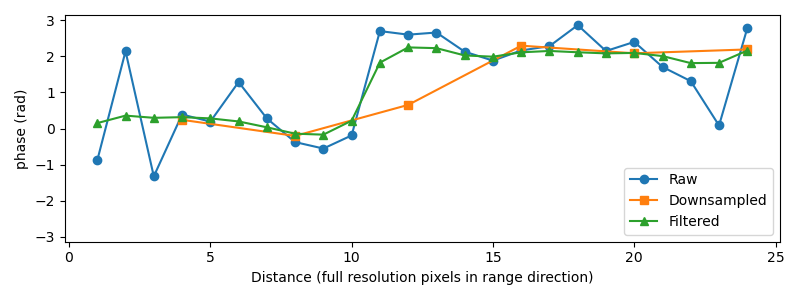

In [6]:
# now plot a cross-section of phases along the middle, left to right. 
fr_middle_row = int(np.round(dy/2))
ds_middle_row = int(np.round(dy_ds/2))

raw_X_section = np.angle(igram[fr_middle_row,:])
ds_X_section = np.angle(igram_ds[ds_middle_row,:])
filt_X_section = np.angle(igram_filt[fr_middle_row,:])

x_vals_fr = np.arange(dx,0,-1)
x_vals_ds = np.arange(dx,rlooks/2,-rlooks)

plt.figure(figsize=(8,3),tight_layout=True)
plt.plot(x_vals_fr,raw_X_section,'o-',label='Raw')
plt.plot(x_vals_ds,ds_X_section,'s-',label='Downsampled')
plt.plot(x_vals_fr,filt_X_section,'^-',label='Filtered')
plt.xlabel('Distance (full resolution pixels in range direction)'); plt.ylabel('phase (rad)')
plt.ylim([-np.pi,np.pi])
plt.legend()
plt.show()

Plot them all together so I don't have to save as many images.

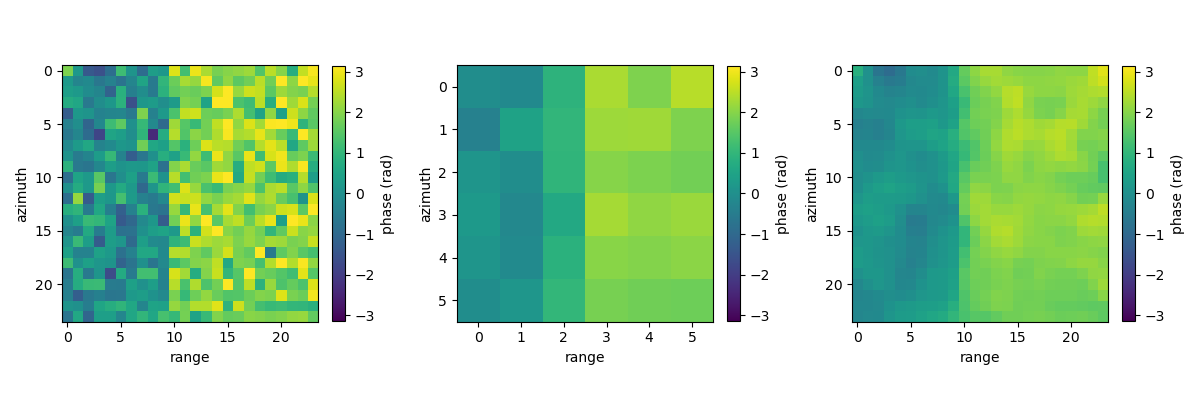

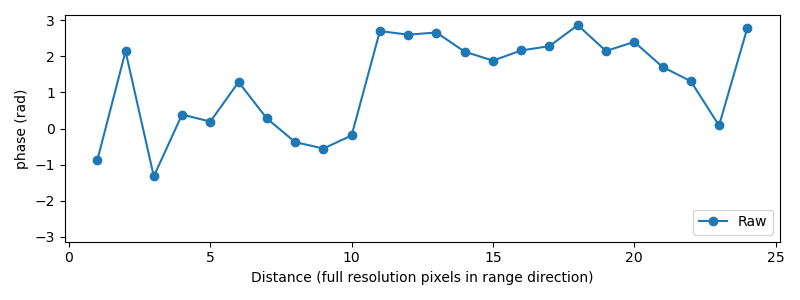

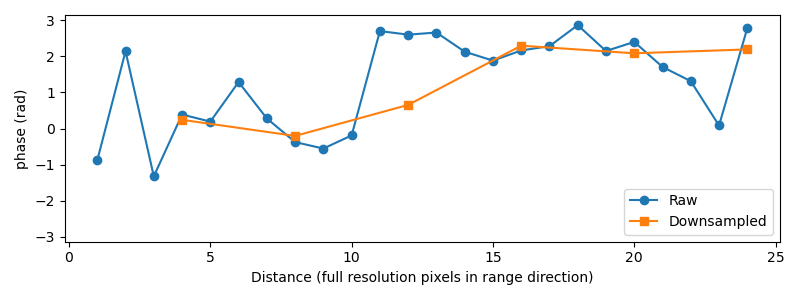

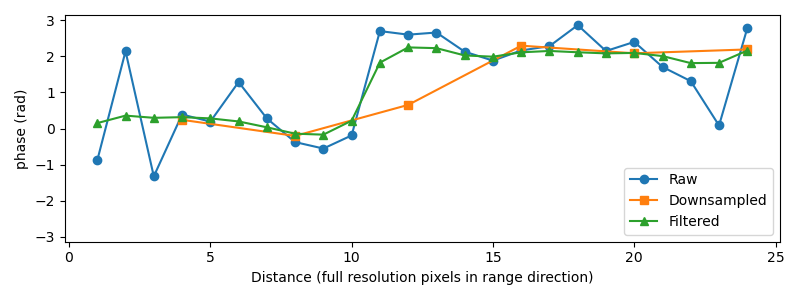

In [7]:
plt.figure(figsize=(12,4),tight_layout=True)
plt.subplot(1,3,1)
plt.imshow(np.fliplr(igram_synth),vmin=-np.pi,vmax=np.pi)
plt.colorbar(label='phase (rad)',fraction=0.045); plt.xlabel('range'); plt.ylabel('azimuth')
plt.subplot(1,3,2)
plt.imshow(np.fliplr(np.angle(igram_ds)),vmin=-np.pi,vmax=np.pi)
plt.colorbar(label='phase (rad)',fraction=0.045); plt.xlabel('range'); plt.ylabel('azimuth')
plt.subplot(1,3,3)
plt.imshow(np.fliplr(np.angle(igram_filt)),vmin=-np.pi,vmax=np.pi)
plt.colorbar(label='phase (rad)',fraction=0.045); plt.xlabel('range'); plt.ylabel('azimuth')
plt.show()

plt.figure(figsize=(8,3),tight_layout=True)
plt.plot(x_vals_fr,raw_X_section,'o-',label='Raw')
plt.xlabel('Distance (full resolution pixels in range direction)'); plt.ylabel('phase (rad)')
plt.ylim([-np.pi,np.pi])
plt.legend(loc='lower right')
plt.show()
plt.figure(figsize=(8,3),tight_layout=True)
plt.plot(x_vals_fr,raw_X_section,'o-',label='Raw')
plt.plot(x_vals_ds,ds_X_section,'s-',label='Downsampled')
plt.xlabel('Distance (full resolution pixels in range direction)'); plt.ylabel('phase (rad)')
plt.ylim([-np.pi,np.pi])
plt.legend(loc='lower right')
plt.show()
plt.figure(figsize=(8,3),tight_layout=True)
plt.plot(x_vals_fr,raw_X_section,'o-',label='Raw')
plt.plot(x_vals_ds,ds_X_section,'s-',label='Downsampled')
plt.plot(x_vals_fr,filt_X_section,'^-',label='Filtered')
plt.xlabel('Distance (full resolution pixels in range direction)'); plt.ylabel('phase (rad)')
plt.ylim([-np.pi,np.pi])
plt.legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


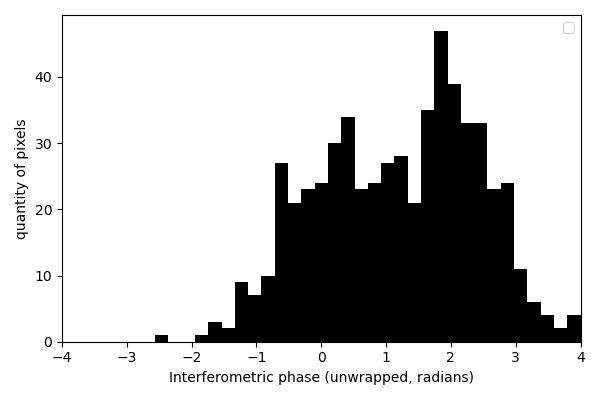

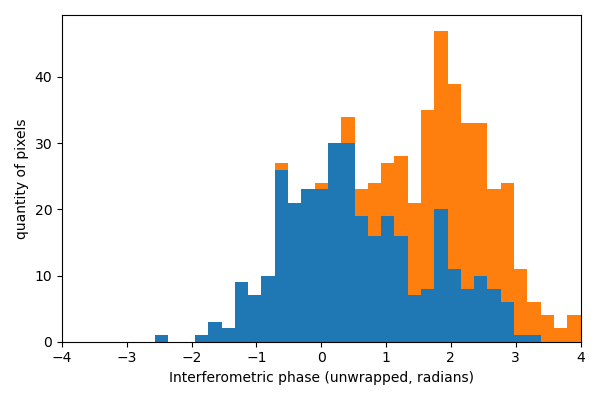

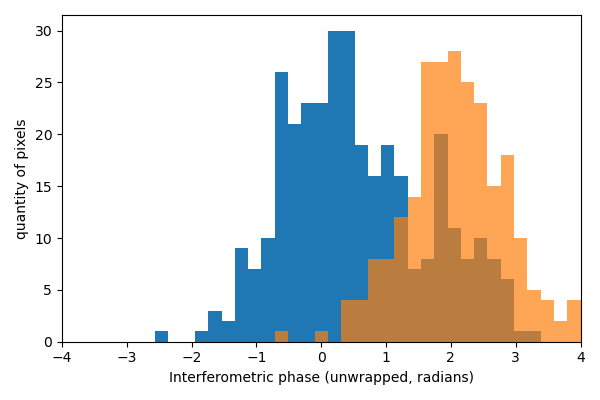

In [11]:
# to plot the two pops separately, must combine into single array padded with Nans so they are the same size.
p1 = igram_synth[:,10::].flatten()
p2 = igram_synth[:,0:10].flatten()
p2supp = np.zeros((len(p1)-len(p2),))*np.nan
p2combo = np.hstack((p2,p2supp))
pmulti = np.vstack((p1,p2combo)).T

bins = np.linspace(-4,4,40)

plt.figure(figsize=(6,4),tight_layout=True)
plt.hist(igram_synth.flatten(),bins=bins,color='k') 
# Ymin,Ymax = plt.ylim()
# plt.vlines(np.median(igram_synth),Ymin,Ymax,'g',linewidth=5,label='median')
# plt.vlines(np.mean(igram_synth),Ymin,Ymax,'b',linewidth=5,label='mean')
# plt.ylim(Ymin,Ymax)
plt.xlim([-4,4])
plt.legend()
plt.xlabel('Interferometric phase (unwrapped, radians)')
plt.ylabel('quantity of pixels')
plt.show()

plt.figure(figsize=(6,4),tight_layout=True)
plt.hist(pmulti,bins=bins,histtype='stepfilled',stacked=True)
plt.xlim([-4,4])
plt.xlabel('Interferometric phase (unwrapped, radians)')
plt.ylabel('quantity of pixels')
plt.show()

plt.figure(figsize=(6,4),tight_layout=True)
plt.hist(p1,bins=bins,histtype='stepfilled',facecolor='tab:blue')
plt.hist(p2,bins=bins,histtype='stepfilled',facecolor='tab:orange',alpha=0.7)
plt.xlim([-4,4])
plt.xlabel('Interferometric phase (unwrapped, radians)')
plt.ylabel('quantity of pixels')
plt.show()

1.2849619045987029
1.225424838617463


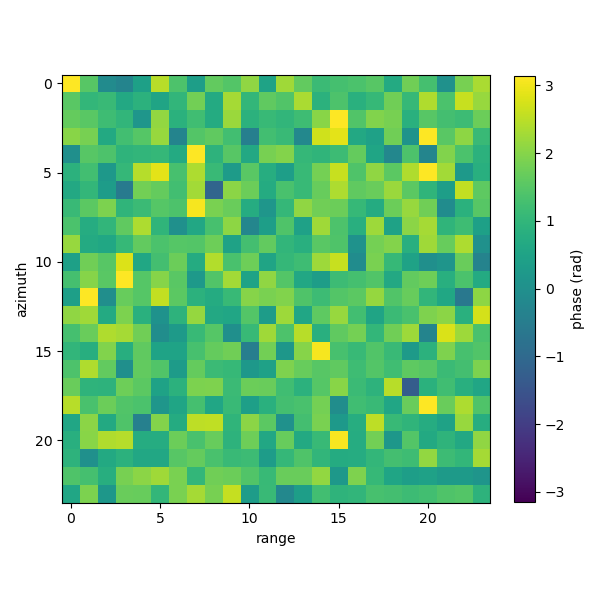

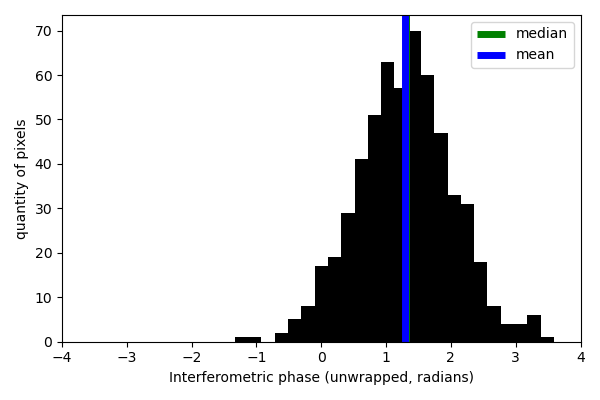

1.2849619045987029


In [9]:
print(np.median(igram_synth))
print(np.std(igram_synth))

np.random.seed(10)
data = np.random.normal(np.median(igram_synth),std,(dy,dx))
dataComp = np.exp(1j*data)
dataAng = np.angle(dataComp)

plt.figure(figsize=(6,6),tight_layout=True)
plt.imshow(np.fliplr(data),vmin=-np.pi,vmax=np.pi)
plt.colorbar(label='phase (rad)',fraction=0.045); plt.xlabel('range'); plt.ylabel('azimuth')
plt.show()

plt.figure(figsize=(6,4),tight_layout=True)
plt.hist(data.flatten(),bins=bins,color='k') 
Ymin,Ymax = plt.ylim()
plt.vlines(np.median(data),Ymin,Ymax,'g',linewidth=5,label='median')
plt.vlines(np.mean(data),Ymin,Ymax,'b',linewidth=5,label='mean')
plt.ylim(Ymin,Ymax)
plt.xlim([-4,4])
plt.legend()
plt.xlabel('Interferometric phase (unwrapped, radians)')
plt.ylabel('quantity of pixels')
plt.show()

print(np.median(igram_synth))

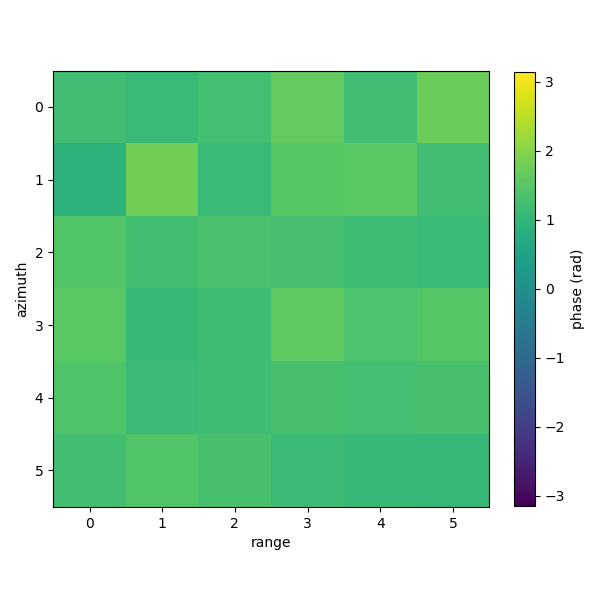

In [10]:
# now downsample it
rlooks = 4   # x-direction
alooks = 4  # y-direction

dy_ds = int(np.round(dy/alooks))
dx_ds = int(np.round(dy/rlooks))
igram_ds_Gauss = np.ndarray((dy_ds,dx_ds),dtype='complex')

for y in range(dy_ds):
    for x in range(dx_ds):
        # add complex numbers then take the angle 
        igram_ds_Gauss[y,x] = (np.sum(dataComp[y*alooks:(y+1)*alooks,x*rlooks:(x+1)*rlooks]))

plt.figure(figsize=(6,6),tight_layout=True)
plt.imshow(np.fliplr(np.angle(igram_ds_Gauss)),vmin=-np.pi,vmax=np.pi)
plt.colorbar(label='phase (rad)',fraction=0.045); plt.xlabel('range'); plt.ylabel('azimuth')
plt.show()